In [1]:
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Final Model

In [2]:
'''
Takes true and predicted values and class names in order and generates a plot
'''
def plotConfMatrix(yTrue, yPredict, clsNames, confusion):
    # Create heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion, annot=True, cmap='Blues', fmt='.2f', xticklabels=clsNames, yticklabels=clsNames)
    
    # Add labels and title
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    plt.show()
    return

'''
Takes training data, test data, trained model, and outputs metrics
'''
def getMetrics(model, xTrain, xTest, yTrain, yTest):
    # Predict on test data
    predictionTrain = model.predict(xTrain)
    predictionTest = model.predict(xTest)
    
    # See metrics
    trainAcc = metrics.accuracy_score(yTrain, predictionTrain)
    testAcc = metrics.accuracy_score(yTest, predictionTest)
    confusion = metrics.confusion_matrix(yTest, predictionTest, normalize='true')
    print(f'Train Accuracy: {trainAcc}%')
    print(f'Test Accuracy: {testAcc}%')
    
    # Generate Confusion Matrix
    plotConfMatrix(yTest, predictionTest, classNames, confusion)
    
    # Generate the classification report
    report = metrics.classification_report(yTest, predictionTest, output_dict=False)
    print(report)
    # reportDF = pd.DataFrame(report).transpose()
    # 
    # # Plot the classification report as a table
    # plt.figure(figsize=(10, 6))
    # sns.heatmap(reportDF, annot=True, cmap='coolwarm', fmt=".2f", yticklabels=reportDF.index, cbar=False)
    # plt.title("Classification Report")
    # plt.show()
    
    return trainAcc, testAcc, confusion

In [3]:
# fetch dataset 
covertype = fetch_ucirepo(id=31)
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets.values.ravel()

classNames = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 'Cottonwood/Willow', 'Aspen', 'Douglas-fir', 'Krummholz']

In [4]:
# Split model into train and test
xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)

(464809, 54) (116203, 54) (464809,) (116203,)


In [7]:
# Setup model
mlp = MLPClassifier(
    hidden_layer_sizes=tuple([60] * 10),
    activation='relu',
    solver='sgd',
    learning_rate='constant',
    learning_rate_init=0.000095,
    max_iter=800,
    random_state=42)
mlp.fit(xTrain, yTrain)

MLPClassifier(hidden_layer_sizes=(60, 60, 60, 60, 60, 60, 60, 60, 60, 60),
              learning_rate_init=9.5e-05, max_iter=800, random_state=42,
              solver='sgd')

Train Accuracy: 0.9061313356669083%
Test Accuracy: 0.8959149075325078%


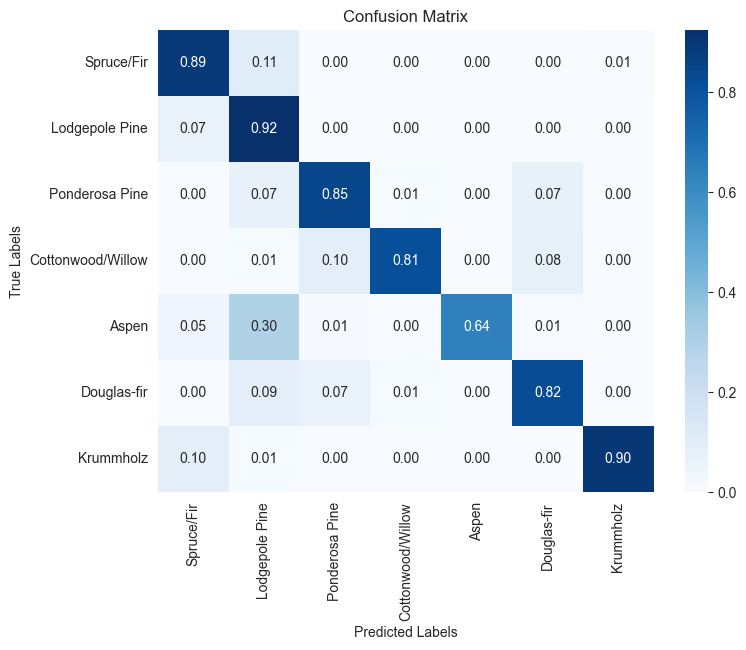

              precision    recall  f1-score   support

           1       0.90      0.89      0.89     42557
           2       0.90      0.92      0.91     56500
           3       0.93      0.85      0.89      7121
           4       0.81      0.81      0.81       526
           5       0.87      0.64      0.74      1995
           6       0.80      0.82      0.81      3489
           7       0.91      0.90      0.90      4015

    accuracy                           0.90    116203
   macro avg       0.87      0.83      0.85    116203
weighted avg       0.90      0.90      0.90    116203


In [8]:
# Get Metrics
trainAcc, testAcc, confusion = getMetrics(mlp, xTrain, xTest, yTrain, yTest)

# Hyper-Parameter Tuning

#### Activation Function

In [ ]:
functions = ['identity', 'logistic', 'tanh', 'relu']
trainAccuracies = []
testAccuracies = []

for function in functions:
    # Setup model
    mlp = MLPClassifier(activation=function, random_state=42)
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(functions, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(functions, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Activation Functions')
plt.legend()
plt.show()

### Number of Nuerons Per Layer

Train Accuracy: 0.7667515043813695%
Test Accuracy: 0.765453559718768%
              precision    recall  f1-score   support

           1       0.74      0.78      0.76     42557
           2       0.79      0.81      0.80     56500
           3       0.80      0.73      0.76      7121
           4       0.71      0.76      0.73       526
           5       0.80      0.13      0.22      1995
           6       0.55      0.44      0.49      3489
           7       0.88      0.58      0.70      4015

    accuracy                           0.77    116203
   macro avg       0.75      0.60      0.64    116203
weighted avg       0.77      0.77      0.76    116203
Train Accuracy: 0.745811720513157%
Test Accuracy: 0.7434575699422562%
              precision    recall  f1-score   support

           1       0.70      0.77      0.74     42557
           2       0.80      0.74      0.77     56500
           3       0.77      0.81      0.79      7121
           4       0.81      0.62      0.70    

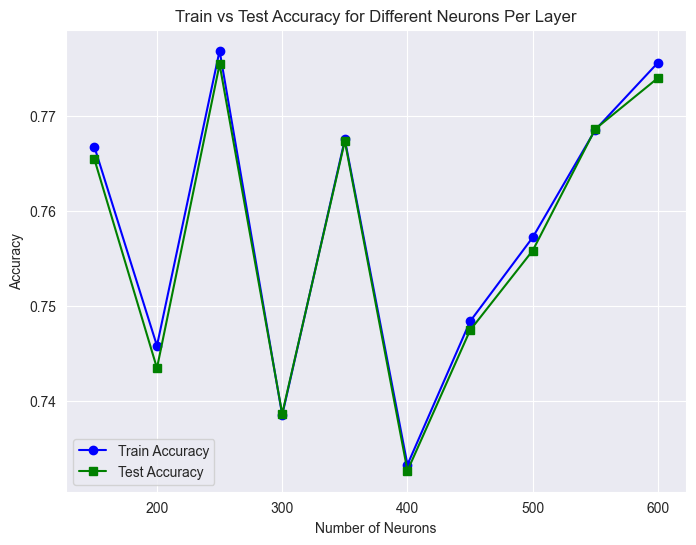

In [8]:
neurons = [150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
trainAccuracies = []
testAccuracies = []

for num in neurons:
    # Setup model
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=(num,), random_state=42)
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(neurons, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(neurons, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Number of Neurons')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Neurons Per Layer')
plt.legend()
plt.show()

### Number of Hidden Layers

In [ ]:
# Setting up list of hidden layer setups
hiddenRange = np.linspace(1, 10, num=10, dtype=int)
neurons = 60
hiddenSizesList = [tuple([neurons] * i) for i in hiddenRange]

trainAccuracies = []
testAccuracies = []

for size in hiddenSizesList:
    # Setup model
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=size, max_iter=500, random_state=42)
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(hiddenRange, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(hiddenRange, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Number of Hidden Layers')
plt.legend()
plt.show()

### Solver

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Train Accuracy: 0.7368682620173017%
Test Accuracy: 0.7350154471054964%
              precision    recall  f1-score   support

           1       0.74      0.72      0.73     42557
           2       0.75      0.82      0.79     56500
           3       0.63      0.77      0.69      7121
           4       0.48      0.33      0.39       526
           5       0.82      0.11      0.19      1995
           6       0.41      0.05      0.08      3489
           7       0.71      0.50      0.59      4015

    accuracy                           0.74    116203
   macro avg       0.65      0.47      0.49    116203
weighted avg       0.73      0.74      0.72    116203
Train Accuracy: 0.9087840381748202%
Test Accuracy: 0.8959493300517198%
              precision    recall  f1-score   support

           1       0.89      0.89      0.89     42557
           2       0.91      0.91      0.91     56500
           3       0.89      0.91      0.90      7121
           4       0.86      0.75      0.80  

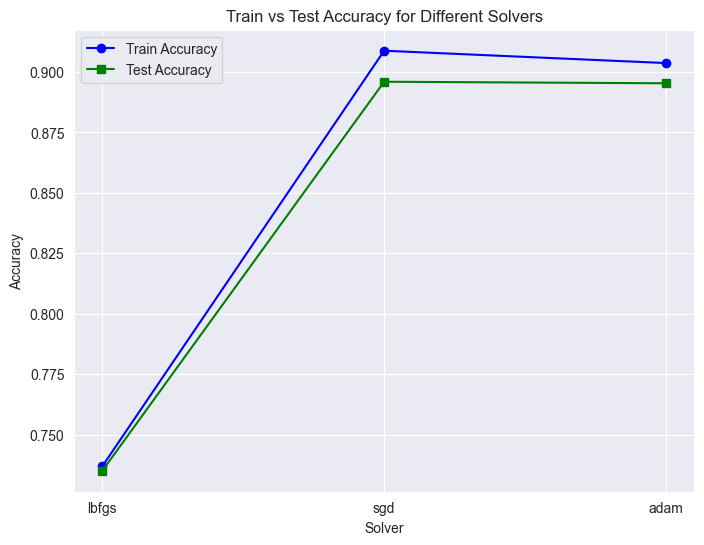

In [5]:
solvers = ['lbfgs', 'sgd', 'adam']

trainAccuracies = []
testAccuracies = []

for solver in solvers:
    # Setup model
    mlp = MLPClassifier(activation='relu', hidden_layer_sizes=tuple([60] * 10), solver=solver, max_iter=500, random_state=42)
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(solvers, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(solvers, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Solver')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Solvers')
plt.legend()
plt.show()

### Learning Rate

Rate = 5e-05


C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.7227420295218036%
Test Accuracy: 0.7215906646127896%
              precision    recall  f1-score   support

           1       0.86      0.48      0.61     42557
           2       0.69      0.92      0.79     56500
           3       0.75      0.84      0.79      7121
           4       0.68      0.80      0.74       526
           5       0.52      0.46      0.49      1995
           6       0.58      0.72      0.64      3489
           7       0.94      0.43      0.59      4015

    accuracy                           0.72    116203
   macro avg       0.71      0.66      0.66    116203
weighted avg       0.75      0.72      0.71    116203

Rate = 6.111111111111111e-05


C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.8321826814885254%
Test Accuracy: 0.8272505873342341%
              precision    recall  f1-score   support

           1       0.90      0.72      0.80     42557
           2       0.80      0.92      0.86     56500
           3       0.85      0.79      0.82      7121
           4       0.80      0.71      0.75       526
           5       0.73      0.51      0.60      1995
           6       0.69      0.73      0.71      3489
           7       0.79      0.90      0.84      4015

    accuracy                           0.83    116203
   macro avg       0.79      0.76      0.77    116203
weighted avg       0.83      0.83      0.82    116203

Rate = 7.222222222222222e-05


C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.627631995077548%
Test Accuracy: 0.6262833145443749%
              precision    recall  f1-score   support

           1       0.79      0.31      0.44     42557
           2       0.61      0.88      0.72     56500
           3       0.56      0.84      0.67      7121
           4       0.55      0.76      0.64       526
           5       0.40      0.35      0.38      1995
           6       0.46      0.61      0.52      3489
           7       0.89      0.26      0.41      4015

    accuracy                           0.63    116203
   macro avg       0.61      0.57      0.54    116203
weighted avg       0.68      0.63      0.59    116203

Rate = 8.333333333333333e-05
Train Accuracy: 0.7970779395407576%
Test Accuracy: 0.7918212094352125%
              precision    recall  f1-score   support

           1       0.91      0.60      0.73     42557
           2       0.74      0.96      0.83     56500
           3       0.82      0.85      0.83      7121
           4    

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.8090785677557879%
Test Accuracy: 0.8028278099532714%
              precision    recall  f1-score   support

           1       0.92      0.64      0.75     42557
           2       0.76      0.94      0.84     56500
           3       0.83      0.82      0.83      7121
           4       0.73      0.76      0.74       526
           5       0.65      0.55      0.60      1995
           6       0.67      0.74      0.71      3489
           7       0.87      0.82      0.84      4015

    accuracy                           0.80    116203
   macro avg       0.78      0.75      0.76    116203
weighted avg       0.82      0.80      0.80    116203

Rate = 0.00011666666666666667
Train Accuracy: 0.8323074639260427%
Test Accuracy: 0.8272764042236431%
              precision    recall  f1-score   support

           1       0.91      0.71      0.80     42557
           2       0.79      0.94      0.86     56500
           3       0.84      0.84      0.84      7121
           4  

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.8412896480059552%
Test Accuracy: 0.8358390058776451%
              precision    recall  f1-score   support

           1       0.91      0.72      0.80     42557
           2       0.80      0.94      0.87     56500
           3       0.89      0.79      0.84      7121
           4       0.76      0.77      0.76       526
           5       0.83      0.48      0.61      1995
           6       0.73      0.75      0.74      3489
           7       0.84      0.87      0.86      4015

    accuracy                           0.84    116203
   macro avg       0.82      0.76      0.78    116203
weighted avg       0.84      0.84      0.83    116203

Rate = 0.0001388888888888889
Train Accuracy: 0.7407773945857331%
Test Accuracy: 0.7355317848936774%
              precision    recall  f1-score   support

           1       0.65      0.86      0.74     42557
           2       0.87      0.66      0.75     56500
           3       0.83      0.77      0.80      7121
           4   

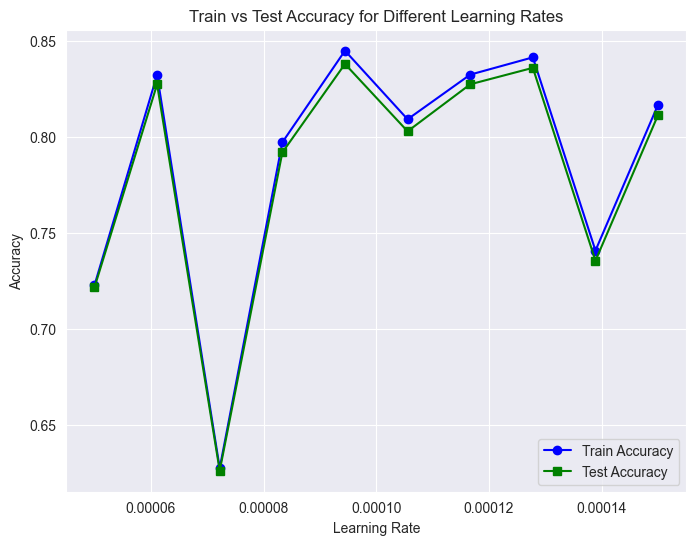

In [6]:
rates = np.linspace(0.00005, 0.00015, num=10)

trainAccuracies = []
testAccuracies = []

for rate in rates:
    # Setup model
    print(f'Rate = {rate}')
    mlp = MLPClassifier(
        learning_rate_init=rate,
        activation='relu',
        solver='sgd',
        hidden_layer_sizes=tuple([60] * 5),
        max_iter=600,
        random_state=42 )
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(rates, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(rates, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Learning Rates')
plt.legend()
plt.show()

### Epochs

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.49158256402092043%
Test Accuracy: 0.4913040110840512%
              precision    recall  f1-score   support

           1       0.46      0.91      0.61     42557
           2       0.57      0.31      0.40     56500
           3       0.75      0.15      0.25      7121
           4       0.00      0.00      0.00       526
           5       0.00      0.00      0.00      1995
           6       0.00      0.00      0.00      3489
           7       0.00      0.00      0.00      4015

    accuracy                           0.49    116203
   macro avg       0.25      0.19      0.18    116203
weighted avg       0.49      0.49      0.43    116203


C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Train Accuracy: 0.8307842576197966%
Test Accuracy: 0.826691221397038%
              precision    recall  f1-score   support

           1       0.85      0.76      0.81     42557
           2       0.82      0.89      0.86     56500
           3       0.84      0.85      0.84      7121
           4       0.61      0.82      0.70       526
           5       0.80      0.44      0.57      1995
           6       0.76      0.66      0.71      3489
           7       0.71      0.88      0.78      4015

    accuracy                           0.83    116203
   macro avg       0.77      0.76      0.75    116203
weighted avg       0.83      0.83      0.82    116203


C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (223) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.8796279762224913%
Test Accuracy: 0.8708639191759249%
              precision    recall  f1-score   support

           1       0.84      0.89      0.87     42557
           2       0.90      0.87      0.88     56500
           3       0.91      0.86      0.88      7121
           4       0.83      0.79      0.81       526
           5       0.91      0.52      0.66      1995
           6       0.79      0.79      0.79      3489
           7       0.82      0.91      0.86      4015

    accuracy                           0.87    116203
   macro avg       0.86      0.81      0.82    116203
weighted avg       0.87      0.87      0.87    116203


C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (334) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.882003145377994%
Test Accuracy: 0.8732821011505727%
              precision    recall  f1-score   support

           1       0.91      0.81      0.86     42557
           2       0.86      0.93      0.89     56500
           3       0.90      0.84      0.87      7121
           4       0.63      0.87      0.73       526
           5       0.80      0.68      0.73      1995
           6       0.71      0.85      0.78      3489
           7       0.88      0.88      0.88      4015

    accuracy                           0.87    116203
   macro avg       0.81      0.84      0.82    116203
weighted avg       0.88      0.87      0.87    116203
Train Accuracy: 0.8699035517814845%
Test Accuracy: 0.8615095995800452%
              precision    recall  f1-score   support

           1       0.81      0.91      0.86     42557
           2       0.91      0.84      0.87     56500
           3       0.90      0.84      0.87      7121
           4       0.72      0.81      0.76   

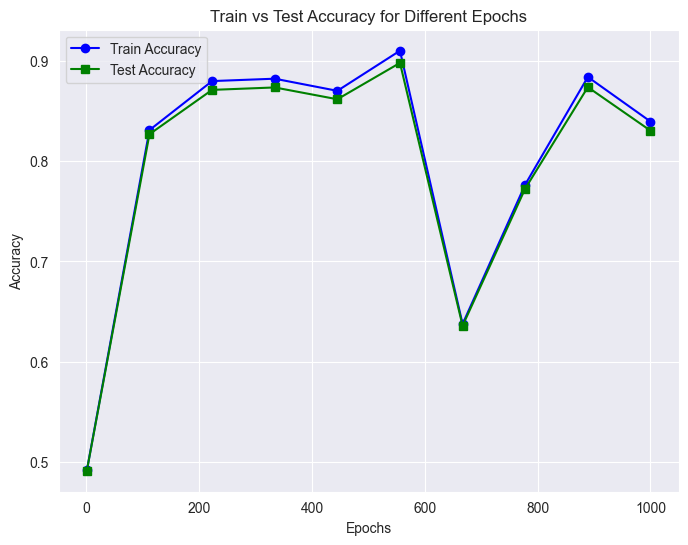

In [9]:
epochs = np.linspace(1, 1000, num=10)

trainAccuracies = []
testAccuracies = []

for epoch in epochs:
    # Setup model
    mlp = MLPClassifier(activation='relu', solver='sgd', hidden_layer_sizes=tuple([60] * 10), max_iter=int(epoch), random_state=42)
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(epochs, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(epochs, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Train vs Test Accuracy for Different Epochs')
plt.legend()
plt.show()

### Constant vs Variable Learning Rate

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


Train Accuracy: 0.878780316215908%
Test Accuracy: 0.8711909331084395%
              precision    recall  f1-score   support

           1       0.87      0.86      0.87     42557
           2       0.88      0.90      0.89     56500
           3       0.87      0.88      0.87      7121
           4       0.90      0.71      0.79       526
           5       0.77      0.64      0.70      1995
           6       0.75      0.83      0.79      3489
           7       0.95      0.75      0.84      4015

    accuracy                           0.87    116203
   macro avg       0.85      0.80      0.82    116203
weighted avg       0.87      0.87      0.87    116203
Train Accuracy: 0.5535714669896667%
Test Accuracy: 0.5548479815495297%
              precision    recall  f1-score   support

           1       0.55      0.52      0.53     42557
           2       0.55      0.73      0.63     56500
           3       0.76      0.14      0.24      7121
           4       0.00      0.00      0.00   

C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Trever\PycharmProjects\CoverType\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

Train Accuracy: 0.8454763139267958%
Test Accuracy: 0.8379559908091874%
              precision    recall  f1-score   support

           1       0.78      0.90      0.84     42557
           2       0.91      0.80      0.85     56500
           3       0.88      0.84      0.86      7121
           4       0.84      0.74      0.79       526
           5       0.77      0.55      0.64      1995
           6       0.71      0.84      0.77      3489
           7       0.76      0.92      0.83      4015

    accuracy                           0.84    116203
   macro avg       0.81      0.80      0.80    116203
weighted avg       0.85      0.84      0.84    116203


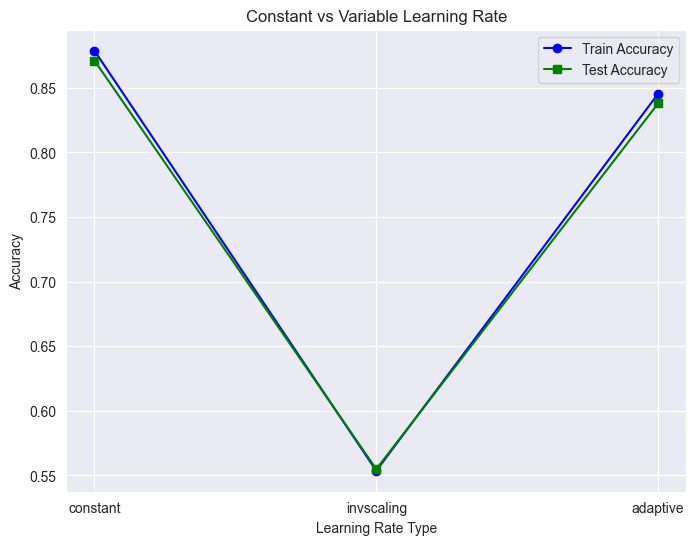

In [13]:
learnType = ['constant', 'invscaling', 'adaptive']

trainAccuracies = []
testAccuracies = []

for rate in learnType:
    # Setup model
    if rate == 'invscaling':
        lr = 0.0006
    else:
        lr = 0.0001
    mlp = MLPClassifier(
        activation='relu',
        solver='sgd',
        hidden_layer_sizes=tuple([60] * 10),
        max_iter=600,
        learning_rate=rate,
        learning_rate_init=lr,
        random_state=42)
    mlp.fit(xTrain, yTrain)
    
    # Get Metrics
    trainAcc, testAcc, _ = getMetrics(mlp, xTrain, xTest, yTrain, yTest)
    
    # Append results
    trainAccuracies.append(trainAcc)
    testAccuracies.append(testAcc)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(learnType, trainAccuracies, marker='o', label='Train Accuracy', color='b')
plt.plot(learnType, testAccuracies, marker='s', label='Test Accuracy', color='g')
plt.xlabel('Learning Rate Type')
plt.ylabel('Accuracy')
plt.title('Constant vs Variable Learning Rate')
plt.legend()
plt.show()